# Doctor consultation fee project

The project aims to build a model to predict the consultation fees of a doctor by checking the previous records.

This helps us to evaluate a doctors consultation fee in case of any emergency, by checking features like -

- Qualification: Qualification and degrees held by the doctor
- Experience: Experience of the doctor in number of years
- Rating: Rating given by patients
- Profile: Type of the doctor
- Miscellaneous_Info: Extra information about the doctor
- Place: Area and the city where the doctor is located.

In [2032]:
#Importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2033]:
data = pd.read_excel('Final_Train.xlsx', sheet_name='Sheet1')

In [2034]:
data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


Observation -

Our data consists of 5961 rows and 7 columns. Fees is our target variable.

We will be using regression models in this problem.

# Exploratory data analysis

Beginning with the Exploratory data analysis.

In [2035]:
data.sample(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
3940,"BAMS, MD - Ayurveda Medicine",29 years experience,NaN,"Barkatpura, Hyderabad",Ayurveda,NaN,200
2060,"MBBS, MD - General Medicine",10 years experience,NaN,"Pallikaranai, Chennai",General Medicine,Viral Fever Treatment Health Checkup (General)...,350
2488,"MBBS, MD - Dermatology , Venereology & Leprosy...",8 years experience,95%,"HSR Layout, Bangalore",Dermatologists,"95% 105 Feedback HSR Layout, Bangalore",350
2655,"MBBS, MD - General Medicine",13 years experience,NaN,"Tambaram West, Chennai",General Medicine,NaN,300
2301,"Fellowship in Head & Neck Oncology Surgery, MB...",11 years experience,NaN,"Sion East, Mumbai",ENT Specialist,NaN,100
4479,MDS - Oral & Maxillofacial Surgery,32 years experience,NaN,"Vileparle West, Mumbai",Dentist,Oral Surgery Procedures Oral & Maxillofacial S...,500
1855,"MDS - Periodontics, BDS",4 years experience,100%,"Indiranagar, Bangalore",Dentist,Bleeding Gums Treatment Gum Disease Treatment/...,500
3420,"MBBS, MD - General Medicine",14 years experience,NaN,"Yelahanka New Town, Bangalore",General Medicine,NaN,250
579,"MBBS, MS - ENT",30 years experience,92%,"Pitampura, Delhi",ENT Specialist,"92% 9 Feedback Pitampura, Delhi",800
370,"MBBS, MD - Dermatology",8 years experience,NaN,"Jogeshwari East, Mumbai",Dermatologists,NaN,400


In [2036]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


From the above info display, we observe that -

- Qualification is of object datatype
- Experience is also of datatype, since the experience is mentioned as '10 years experience'. We will need to convert it to numeric data.
- Rating is also object since rating is written as 97%. The % sign will need to be removed.
- Rating column also has NaN values, that would need to be replaced since the number of missing values is high.
- Place is of object type, and contains a few null values.
- Profile does not have null values, and is of object type.
- Miscellaneous info contains string data, and has null values which might require treatment.
- Fees column has numeric values, and has datatype int. Fees column is our target variable and does not have null values.

In [2037]:
#Exploring the Qualification column -

data.Qualification.unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [2038]:
len(data.Qualification.unique())

1420

The Qualification column has 1420 different types of strings. We will need to separate out the qualifications, and provide it as an input to our model.

In [2039]:
data.Qualification.value_counts()[:20]

BDS                                                488
BHMS                                               477
BAMS                                               471
MBBS                                               334
MBBS, MS - ENT                                     220
MBBS, MD - Dermatology                             178
MBBS, MD - General Medicine                        177
MBBS, MD - Dermatology , Venereology & Leprosy     140
BHMS, MD - Homeopathy                               93
MBBS, DDVL                                          92
MBBS, Diploma in Otorhinolaryngology (DLO)          84
BAMS, MD - Ayurveda Medicine                        82
BDS, MDS - Conservative Dentistry & Endodontics     68
MBBS, DDV                                           66
BDS, MDS                                            63
BDS, MDS - Oral & Maxillofacial Surgery             57
MD - Dermatology , Venereology & Leprosy, MBBS      52
BDS, MDS - Prosthodontics                           45
MBBS, MS -

We observe that the highest number of qualifications are -

- BDS
- BHMS
- BAMS
- MBBS
- MS
- MD
- DDVL
- DLO
- DDV

We will categorize our data according to these qualifications, since the Qualifications column has a large number of categories, which will not allow our model to learn properly.

In [2040]:
#Splitting the data from Qualification column based on ',' and adding it to a new column

data['Qualification'] = data.Qualification.str.split(',')
Qualification = {}
for i in data['Qualification'].values:
    for j in i:
        j = j.strip()
        if j in Qualification:
            Qualification[j]=Qualification[j]+1
        else:
            Qualification[j]=1

In [2041]:
Qualification

{'BHMS': 749,
 'MD - Homeopathy': 181,
 'BAMS': 764,
 'MD - Ayurveda Medicine': 139,
 'MBBS': 2808,
 'MS - Otorhinolaryngology': 103,
 'BSc - Zoology': 3,
 'BDS': 1363,
 'MD - General Medicine': 285,
 'BSc': 3,
 'MS': 2,
 'DNB - ENT': 111,
 'MDS': 82,
 'MDS - Oral & Maxillofacial Surgery': 104,
 'Diploma in Otorhinolaryngology (DLO)': 250,
 'MF- Homeopathy': 5,
 'MS - ENT': 411,
 'DNB': 58,
 'Fellowship of College of General Practice (FCGP)': 13,
 'DDVL': 161,
 'IBCLC (USA)': 1,
 'Post Graduate Diploma in Diabetology (PGDD)': 53,
 'Diploma in Dermatology': 67,
 'Fellowship in Aesthetic Medicine': 23,
 'DM - Neurology': 6,
 'MD - Pediatrics': 13,
 'Fellowship in Cleft Lip and Craniofacial Surgery': 1,
 'Diploma in Cosmetology': 3,
 'AFIH': 4,
 'MDS - Prosthodontist And Crown Bridge': 45,
 'M. D. Hom. (Practice of Medicine)': 2,
 'Diploma in Emergency Medicine': 8,
 'Diploma in Counselling Skills': 2,
 'DHMS (Diploma in Homeopathic Medicine and Surgery)': 47,
 'MD - Dermatology': 606,
 '

In [2042]:
max_qualifications = sorted(Qualification.items(), key=lambda x:x[1], reverse = True)[:10]

In [2043]:
max_qualifications

[('MBBS', 2808),
 ('BDS', 1363),
 ('BAMS', 764),
 ('BHMS', 749),
 ('MD - Dermatology', 606),
 ('MS - ENT', 411),
 ('Venereology & Leprosy', 297),
 ('MD - General Medicine', 285),
 ('Diploma in Otorhinolaryngology (DLO)', 250),
 ('MD - Homeopathy', 181)]

In [2044]:
final_qualifications = []

for i in max_qualifications:
    final_qualifications.append(i[0])
    
for heading in final_qualifications:
    data[heading] = 0
    
for x,y in zip(data['Qualification'].values, np.array([idx for idx in range(len(data))])):
    for n in x:
        n = n.strip()
        if n in final_qualifications:
            data[n][y] = 1

            
data.drop('Qualification', axis = 1, inplace = True)

In [2045]:
data

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,0,0,0,0,0,1
1,12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,0,0,0,0,0,0
2,9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,1,0,0,0,0,0,0,0,0,0
3,12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,1,0,0,0,0,0,0,0
4,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,1,0,0,0,0,1,0,0,0,0
5957,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100,1,0,0,0,0,0,0,0,0,0
5958,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,1,0,0,0,0,0,0,0,0,0
5959,15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,1,0,0,0,0,0,0,1,0,0


In [2046]:
#Checking a sample of data

data.sample(10)

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
146,10 years experience,89%,"Vadapalani, Chennai",Dermatologists,Dermabrasion Chemical Peel Scar Treatment,800,1,0,0,0,0,0,0,0,0,0
5187,0 years experience,NaN,NaN,Dermatologists,NaN,100,0,0,0,0,0,0,0,0,0,0
5159,15 years experience,NaN,"Dilsukhnagar, Hyderabad",Homeopath,NaN,450,0,0,0,0,0,0,0,0,0,1
2803,9 years experience,100%,"Gandhipuram, Coimbatore",Dentist,"100% 11 Feedback Gandhipuram, Coimbatore",100,0,1,0,0,0,0,0,0,0,0
3103,11 years experience,NaN,"Pitampura, Delhi",Homeopath,NaN,600,0,0,0,1,0,0,0,0,0,0
1574,10 years experience,97%,"Rajajinagar, Bangalore",General Medicine,Physician Viral Fever Treatment Chickenpox Tre...,450,1,0,0,0,0,0,0,1,0,0
1396,10 years experience,96%,"West Of Chord Road, Bangalore",Dermatologists,"96% 20 Feedback West Of Chord Road, Bangalore",300,1,0,0,0,0,0,0,0,0,0
5959,15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,1,0,0,0,0,0,0,1,0,0
5380,25 years experience,NaN,"Old Rajendra Nagar, Delhi",Homeopath,Skin Allergy Treatment Arthritis Management Mu...,450,0,0,0,1,0,0,0,0,0,0
3909,3 years experience,NaN,"Anna Nagar, Chennai",Homeopath,Skin Disease Treatment Hair Fall Migraine Trea...,450,0,0,0,1,0,0,0,0,0,0


We have successfully created separate columns for qualification for all rows.

In [2047]:
#Extracting the years of experience from 'Experience column'

data['Experience_years'] = data.Experience.str.split(' ')

In [2048]:
for i in range(len(data.Experience)):
    data['Experience'][i] = data['Experience_years'][i][0]

In [2049]:
data.drop('Experience_years', axis = 1, inplace = True)

In [2050]:
data

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,0,0,0,0,0,1
1,12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,0,0,0,0,0,0
2,9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,1,0,0,0,0,0,0,0,0,0
3,12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,1,0,0,0,0,0,0,0
4,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,1,0,0,0,0,1,0,0,0,0
5957,33,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100,1,0,0,0,0,0,0,0,0,0
5958,41,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,1,0,0,0,0,0,0,0,0,0
5959,15,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,1,0,0,0,0,0,0,1,0,0


In [2051]:
#Removing % sign from Rating column -

data['Rating_value'] = data.Rating.str.split('%')

In [2052]:
data['Rating_value'][0][0]

'100'

In [2053]:
for i in range(len(data.Rating)):
    if data['Rating_value'][i] is not np.NaN:
        data['Rating'][i] = data['Rating_value'][i][0]

In [2054]:
data

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,Rating_value
0,24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,0,0,0,0,0,1,"[100, ]"
1,12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,0,0,0,0,0,0,"[98, ]"
2,9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,1,0,0,0,0,0,0,0,0,0,NaN
3,12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,1,0,0,0,0,0,0,0,NaN
4,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,0,0,0,0,0,0,"[100, ]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,1,0,0,0,0,1,0,0,0,0,"[98, ]"
5957,33,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100,1,0,0,0,0,0,0,0,0,0,NaN
5958,41,97,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,1,0,0,0,0,0,0,0,0,0,"[97, ]"
5959,15,90,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,1,0,0,0,0,0,0,1,0,0,"[90, ]"


In [2055]:
#Exploring the profile column

data.Profile.unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

The column contains 6 different types of Profiles.

In [2056]:
#Exploring the Place column

data.Place.value_counts()

HSR Layout, Bangalore            75
Andheri West, Mumbai             70
Dwarka, Delhi                    67
Banjara Hills, Hyderabad         64
Mulund West, Mumbai              54
                                 ..
Ganganagar, Bangalore             1
Nayandahalli, Bangalore           1
Deonar, Mumbai                    1
TV Museum, Thiruvananthapuram     1
Mandapeshwar, Mumbai              1
Name: Place, Length: 877, dtype: int64

The place column contains an Area, and a city name, separated using ','. We will create 2 separate columns for this field.

In [2057]:
data['Area'] = np.NaN
data['City'] = np.NaN

In [2058]:
data['Place_new'] = data.Place.str.split(',')

In [2059]:
for i in range(len(data)):
    if data['Place_new'][i] is not np.NaN:
        if len(data['Place_new'][i]) == 2:
            data['Area'][i] = data['Place_new'][i][0]
            data['City'][i] = data['Place_new'][i][1]
        else:
            data['City'][i] = data['Place_new'][i][0]

In [2060]:
data

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,Rating_value,Area,City,Place_new
0,24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,0,0,0,0,0,1,"[100, ]",Kakkanad,Ernakulam,"[Kakkanad, Ernakulam]"
1,12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,0,0,0,0,0,0,"[98, ]",Whitefield,Bangalore,"[Whitefield, Bangalore]"
2,9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,1,0,0,0,0,0,0,0,0,0,NaN,Mathikere - BEL,Bangalore,"[Mathikere - BEL, Bangalore]"
3,12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,1,0,0,0,0,0,0,0,NaN,Bannerghatta Road,Bangalore,"[Bannerghatta Road, Bangalore]"
4,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,0,0,0,0,0,0,"[100, ]",Keelkattalai,Chennai,"[Keelkattalai, Chennai]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,1,0,0,0,0,1,0,0,0,0,"[98, ]",Basavanagudi,Bangalore,"[Basavanagudi, Bangalore]"
5957,33,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100,1,0,0,0,0,0,0,0,0,0,NaN,Nungambakkam,Chennai,"[Nungambakkam, Chennai]"
5958,41,97,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,1,0,0,0,0,0,0,0,0,0,"[97, ]",Greater Kailash Part 2,Delhi,"[Greater Kailash Part 2, Delhi]"
5959,15,90,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,1,0,0,0,0,0,0,1,0,0,"[90, ]",Vileparle West,Mumbai,"[Vileparle West, Mumbai]"


In [2061]:
data.City.unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', nan, 'Dwarka',
       'e'], dtype=object)

In [2062]:
data.Place_new

0                 [Kakkanad,  Ernakulam]
1               [Whitefield,  Bangalore]
2          [Mathikere - BEL,  Bangalore]
3        [Bannerghatta Road,  Bangalore]
4               [Keelkattalai,  Chennai]
                      ...               
5956          [Basavanagudi,  Bangalore]
5957            [Nungambakkam,  Chennai]
5958    [Greater Kailash Part 2,  Delhi]
5959           [Vileparle West,  Mumbai]
5960                 [Pitampura,  Delhi]
Name: Place_new, Length: 5961, dtype: object

In [2063]:
#Checking different types of values which exist in Area column

len(data.Area.unique())

866

In [2064]:
data.Area.value_counts()

HSR Layout       75
Andheri West     70
Dwarka           67
Banjara Hills    64
Mulund West      54
                 ..
Uday Park         1
Vyasarpadi        1
Vellakinar        1
Pachalam          1
Champapet         1
Name: Area, Length: 865, dtype: int64

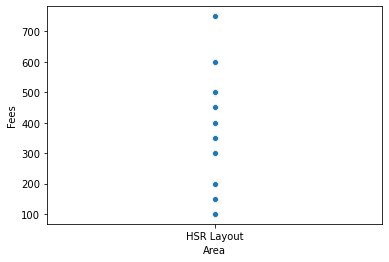

In [ ]:
Area_fields = data[data['Area'] == 'HSR Layout']

sns.scatterplot(x = Area_fields['Area'], y = Area_fields['Fees'])

The area field does not have any specific relation to the fees. The column has 867 distinct values, and that also is not evenly divided.

Hence we will drop this column as this wont allow our model to learn more.

In [ ]:
data.drop('Area', axis =1, inplace = True)

In [ ]:
data.sample(20)

In [ ]:
#Checking data in Miscellaneous column

data['Miscellaneous_Info']

In [ ]:
Misc_empty = data[data['Miscellaneous_Info'].isnull()==True]

In [ ]:
sns.distplot(Misc_empty['Fees'])

The fees is spread between the lowest and highest range of fees where Miscellaneous info is not available.

Also the number of missing values in Miscellaneous column is 2620 (43%)
The values available also have information like rating, Place etc, which are also available with us in separate columns. Hence we will drop this column.

In [ ]:
data.drop('Miscellaneous_Info', axis =1, inplace = True)

Dropping all the extra columns from our dataframe.

We will drop -

- Place - Since we have City stored in a separate column
- Rating_value - Since we have already manipulated the Rating column
- Place_new - We already have the city in a separate column.

In [ ]:
data.drop(['Place', 'Rating_value', 'Place_new'], axis = 1, inplace = True)

In [ ]:
data

In [ ]:
data.info()

In [ ]:
#Filling NaN values in Rating column

data.Rating.fillna('-99', inplace = True)

In [ ]:
#Filling NaN values in city column

data.City.fillna('Unknown', inplace = True)

In [ ]:
data.info()

In [ ]:
data.sample(20)

### We now proceed to plot the data that we have extracted as important.

In [ ]:
#Experience column is in object datatype. Converting it to integer type

data['Experience'] = data['Experience'].astype(int)

In [ ]:
data.info()

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data['Experience'])

Observation -

The highest count of experience lies within the range 3 years to 23 years.
The count decreases as the number of experience years increases.

The fees does not increase as the experience increases.

In [ ]:
#Comparing rating with Fees

plt.figure(figsize=(12,7))
sns.scatterplot(x = data['Rating'], y = data['Fees'])

In [ ]:
#Converting the rating into multiple bins

data['Rating'] = data['Rating'].astype(int)

bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
data['Rating'] = pd.cut(data['Rating'], bins = bins, labels = labels, include_lowest = True)

In [ ]:
data

In [ ]:
#Checking fees and rating

plt.figure(figsize=(12,7))
sns.scatterplot(x = data['Rating'], y = data['Fees'])

Observation -

The rating fields encounters a steep increase in percentage after 88%.
The count for values below 88% rating are quite low.

Apart from this, the rating column has 2659 values present, and rest of the values are missing, which is around 58% of data.
We will replace the missing data with mean value of the profile rating, to maintain consistency in data.

We also observe that the highest paid doctors have a rating of 90 above.

In [ ]:
#Exploring the Profile column

sns.countplot(data['Profile'])
plt.xticks(rotation=90)
data['Profile'].value_counts()

In [ ]:
#Comparing profile with Fees

sns.scatterplot(y = data['Profile'], x = data['Fees'])

In [ ]:
data['Profile'].value_counts()

Observation -

The dentists have the highest count (1397)
Followed by -
- General Medicine    1173
- Dermatologists      1034
- Homeopath            843
- Ayurveda             786
- ENT Specialist       728


No linear relation is found between Profile and Fees.

In [ ]:
#Exploring the Fees column

sns.distplot(data['Fees'])

Observation -

The data is right skewed.
Majority of the rows have fees within 0 - 200.
Count of rows with Fees as ~500 is also high.

In [ ]:
#Exploring the City column

sns.countplot(data['City'])
plt.xticks(rotation=90)
data['City'].value_counts()

There is only 1 entry for Dwarka city and 1 for 'e'. We will drop these rows.

In [ ]:
data[data['City']=='Dwarka']

In [ ]:
data.drop(2169, axis = 0, inplace = True)

In [ ]:
data

In [ ]:
data[data['City']=='e']

In [ ]:
data.drop(3980, axis = 0, inplace = True)

In [ ]:
data

Final observation for City column -

We have 9 unique values in the city column.
Number of entries for Bangalore is the highest.

In [ ]:
#Checking relationship of cities with Fees

sns.scatterplot(x=data['City'], y=data['Fees'])
plt.xticks(rotation = 90)

Observation -

Fees in metrocities is observed to be higher than the rest.
In other cities, the price usually ranges under 600.

### Conclusion for the EDA -

- Metro cities have higher fees
- Higher number of qualifications have lesser experience.
- Rating column needs to be treated for missing values.
- Qualification count has an impact on fees


In [ ]:
data.describe()

From the above stats, we observe that -

- Majority of the doctors have experience below 23 years.
- 75% of the doctors have fees 500 and below.

In [ ]:
#Plotting correlation heatmap

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot = True)

Observation

- The fees is maximum correlated with MBBS column (27%) and then with MD-Dermatology (16%)and MS-ENT (13%)
- There are multiple columns with negatie correlations - BDS (20%) and BAMS (-16%)
- Rest of the correlations are almost negligible.

### Outliers detection 

In [ ]:
integer_columns = ['Experience', 'Fees']

for i in integer_columns:
    sns.boxplot(data[i])
    plt.show()

We observe outliers in Experience column, but we will keep this values to consider the data where experience of the doctor is large.

### Skewness treatment

In [ ]:
data[integer_columns].skew()

We will need to treat skewness for all Experience column.

We will not change Fees since it is our target variable.

We will use sqrt transform to check if we are able to remove skewness successfully.

In [ ]:
data['Experience'] = np.sqrt(data['Experience'])

In [ ]:
data[integer_columns].skew()

We have successfully completed the skewness removal.

# Encoding the categorical data

In [ ]:
#We will replace the data using one hot encoding since we have values with no particular order

In [ ]:
data = pd.get_dummies(data, columns = ['City', 'Profile'], prefix = ['City', 'Profile'])

In [ ]:
data

# Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
#Dividing the dataset into independent and dependent data before scaling

ds_x = data.drop('Fees', axis = 'columns')
y = data['Fees']

In [ ]:
ds_x

In [ ]:
y

In [ ]:
dataset = sc.fit_transform(ds_x)

x = pd.DataFrame(dataset,columns=ds_x.columns)

In [ ]:
x

# Fitting the Regression models

In [ ]:
#Importing the ML models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [ ]:
#Creating objects for the data models

dt = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()
lr = LinearRegression()

In [ ]:
#Finding best random state, fitting models and checking for regression metrics
test_score_list = []

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 41)
for i in [dt, svr, knn, lr]:
    i.fit(x_train, y_train)
    pred = (i.predict(x_test))
    test_score = r2_score(y_test, pred)
    test_score_list.append(test_score)
    train_score = r2_score(y_train,i.predict(x_train))
    if abs(train_score - test_score) <= 0.09:
        print(i)
        print('R2 score is ',r2_score(y_test, pred))
        print('R2 for train data', r2_score(y_train,i.predict(x_train)))
        print('Mean absolute error is ',mean_absolute_error(y_test, pred))
        print('Mean squared error is ', mean_squared_error(y_test, pred))
        print('Root mean squared error is ',(mean_squared_error(y_test, pred, squared=False)))
        print('------------------------------------------')

In [ ]:
max(test_score_list)

Observation -

The best scores that we receive using this model are 19%. CHecking for bagging and boosting models to check if they perform any better.

# Ensemble methods

In [ ]:
#Importing the random forest regressor

from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor()

In [ ]:
#Finding the best random state, fitting the data and predicting scores

test_score_list = []

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 41)
rfr.fit(x_train, y_train)
pred = rfr.predict(x_test)
test_score = r2_score(y_test, pred)
test_score_list.append(test_score)
train_score = r2_score(y_train,rfr.predict(x_train))
if abs(train_score - test_score) <= 1:
    print('R2 score for test data is ',r2_score(y_test, pred))
    print('R2 for train data', r2_score(y_train,rfr.predict(x_train)))
    print('Mean absolute error is ',mean_absolute_error(y_test, pred))
    print('Mean squared error is ', mean_squared_error(y_test, pred))
    print('Root mean squared error is ',(mean_squared_error(y_test, pred, squared=False)))
    print('------------------------------------------')

In [ ]:
max(test_score_list)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [ ]:
ad = AdaBoostRegressor()
gd = GradientBoostingRegressor()

In [ ]:
#Finding the best random state, fitting the data and predicting scores on Adaboost regressor

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 41)
ad.fit(x_train, y_train)
pred = ad.predict(x_test)
test_score = r2_score(y_test, pred)
test_score_list.append(test_score)
train_score = r2_score(y_train,ad.predict(x_train))
if abs(train_score - test_score) <= 0.2:
    print('R2 score for test data is ',r2_score(y_test, pred))
    print('R2 for train data', r2_score(y_train,ad.predict(x_train)))
    print('Mean absolute error is ',mean_absolute_error(y_test, pred))
    print('Mean squared error is ', mean_squared_error(y_test, pred))
    print('Root mean squared error is ',(mean_squared_error(y_test, pred, squared=False)))
    print('------------------------------------------')

In [ ]:
max(test_score_list)

In [ ]:
#Finding the best random state, fitting the data and predicting scores on GradientBoostRegressor

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 41)
gd.fit(x_train, y_train)
pred = gd.predict(x_test)
test_score = r2_score(y_test, pred)
test_score_list.append(test_score)
train_score = r2_score(y_train,gd.predict(x_train))
if abs(train_score - test_score) <= 1:
    print('R2 score for test data is ',r2_score(y_test, pred))
    print('R2 for train data', r2_score(y_train,gd.predict(x_train)))
    print('Mean absolute error is ',mean_absolute_error(y_test, pred))
    print('Mean squared error is ', mean_squared_error(y_test, pred))
    print('Root mean squared error is ',(mean_squared_error(y_test, pred, squared=False)))
    print('------------------------------------------')

In [ ]:
max(test_score_list)

Observation


We observe that we receive 21 % accuracy on Gradient Boosting Regressor, hence we proceed with the gradient boosting as our final model. But before that, we check cross val scores and Regularization methods scores as well

# Cross validation 

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
for i in [dt, svr, knn, lr, rfr, ad, gd]:
    cv = cross_val_score(i, x, y, cv=5, scoring = 'r2')
    print(i, cv.mean())

Observation -

The best score is received at GradientBoosting in case of cross validation as well.

# Regularization methods

In [ ]:
#Importing models

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

ls = Lasso(alpha = 0.0001)
rd = Ridge(alpha = 0.0001)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 41)

In [ ]:
#Fitting the model

ls.fit(x_train, y_train)

In [ ]:
#Prediction

t = ls.predict(x_test)

In [ ]:
#Scoring

print('Test data',r2_score(y_test, t))
print('Test data',r2_score(y_train, ls.predict(x_train)))


In [ ]:
#Fitting in ridge

rd.fit(x_train, y_train)

In [ ]:
#Prediction

r = rd.predict(x_test)

In [ ]:
#Scoring

print('Test data',r2_score(y_test, r))
print('Test data',r2_score(y_train, rd.predict(x_train)))

In [ ]:
#Elastic net model

from sklearn.linear_model import ElasticNet

In [ ]:
el = ElasticNet(alpha = 0.0001)

In [ ]:
#Fitting the model

el.fit(x_train, y_train)

In [ ]:
#Prediction and scoring

p = el.predict(x_test)
print('Test data',r2_score(y_test, p))
print('Test data',r2_score(y_train, el.predict(x_train)))

In [ ]:
#Cross validation of regularization models

for i in [ls, rd, el]:
    cv = cross_val_score(i, x, y, cv=5, scoring = 'r2')
    print(i, cv.mean())

Observation -

Since the scores are still lesser than Gradient boost, we proceed with Gradient boosting regressor as our final model, on random state 41

# Hypertuning the Gradient Boost regressor

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gd.get_params()

In [ ]:
params = {'learning_rate': [0.1,0.01],'max_depth': [3,4,5], 'min_samples_leaf': [1,2], 'min_samples_split': [2,3], 'n_estimators': [10,50,100], 'alpha':[0.9,0.1,0.01]}

In [ ]:
gcv = GridSearchCV(gd,params)

In [ ]:
#res = gcv.fit(x_train,y_train)

In [ ]:
res.best_params_

In [ ]:
res.best_score_

List of best params -

{'alpha': 0.9,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

# Saving model with best params



In [ ]:
gd_final = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100)

In [ ]:
gd_final.fit(x_train, y_train)

In [ ]:
pred = gd_final.predict(x_test)

In [ ]:
print(r2_score(y_test, pred))

In [ ]:
print('Mean absolute error is ',mean_absolute_error(y_test, pred))
print('Mean squared error is ', mean_squared_error(y_test, pred))
print('Root mean squared error is ',(mean_squared_error(y_test, pred, squared=False)))

Observation -

The parameters which were identified as the best using grid search were the default parameters.

We have successfully saved the model which gave us the best results.




# Saving model using Joblib

In [ ]:
import joblib

In [ ]:
joblib.dump(gd_final,'doctor_fee.obj')

# Predicting for test data

In [ ]:
test = pd.read_excel('Final_Test.xlsx', sheet_name='Sheet1')

In [ ]:
test.info()

In [ ]:
test

In [ ]:
# treating the Qualifications column

test['Qualification'] = test.Qualification.str.split(',')

for heading in final_qualifications:
    test[heading] = 0
    
for x,y in zip(test['Qualification'].values, np.array([idx for idx in range(len(test))])):
    for n in x:
        n = n.strip()
        if n in final_qualifications:
            test[n][y] = 1

In [ ]:
test

In [ ]:
test.drop('Qualification', axis = 1, inplace = True)

In [ ]:
#Extracting the years of experience from 'Experience column'

test['Experience_years'] = test.Experience.str.split(' ')

In [ ]:
for i in range(len(test.Experience)):
    test['Experience'][i] = test['Experience_years'][i][0]

In [ ]:

test.drop('Experience_years', axis = 1, inplace = True)

In [ ]:
test['Experience'] = test['Experience'].astype(int)

In [ ]:

#Removing % sign from Rating column -

test['Rating_value'] = test.Rating.str.split('%')

In [ ]:

for i in range(len(test.Rating)):
    if test['Rating_value'][i] is not np.NaN:
        test['Rating'][i] = test['Rating_value'][i][0]

In [ ]:
#Filling NaN values in Rating column

test.Rating.fillna('-99', inplace = True)

In [ ]:
#Converting the rating into multiple bins

test['Rating'] = test['Rating'].astype(int)

bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
test['Rating'] = pd.cut(test['Rating'], bins = bins, labels = labels, include_lowest = True)

In [ ]:
#Treating Place column

test['Area'] = np.NaN
test['City'] = np.NaN


test['Place_new'] = test.Place.str.split(',')


for i in range(len(test)):
    if test['Place_new'][i] is not np.NaN:
        if len(test['Place_new'][i]) == 2:
            test['Area'][i] = test['Place_new'][i][0]
            test['City'][i] = test['Place_new'][i][1]
        else:
            test['City'][i] = test['Place_new'][i][0]

test.drop('Area', axis =1, inplace = True)

#Filling NaN values in city column

test.City.fillna('Unknown', inplace = True)

In [ ]:
#Dropping misc info column

test.drop('Miscellaneous_Info', axis =1, inplace = True)

In [ ]:
test.drop(['Rating_value','Place_new', 'Place'], axis = 1, inplace = True)

In [ ]:
test

In [ ]:
#Removing skewness from Experience column

test['Experience'] = np.sqrt(test['Experience'])

In [ ]:
test

In [ ]:
# Encoding categorical data

test = pd.get_dummies(test, columns = ['City', 'Profile'], prefix = ['City', 'Profile'])

In [ ]:
test

In [ ]:
#Scaling test data

test_data = sc.fit_transform(test)

In [ ]:
final_test = pd.DataFrame(test_data,columns=test.columns)

In [ ]:
final_test

In [ ]:
model = joblib.load('doctor_fee.obj')

In [ ]:
result = model.predict(final_test)

In [ ]:
predicted_values = pd.DataFrame({'Predicted':result})

In [ ]:
predicted_values

# Conclusion

We have successfully created a model to predict the fee of a doctor.
The model is giving an accuracy of 21% only, symbolizing that the data is not enough for the model to actually learn well.
The mean absolute error is around 130 and root mean squared error is around 160.

The features used as independent data have a wide range of fee spread among them, and the correlations of fee with the independent variables is quite low.

The model should be fed with more data which actually impacts the fee in a specific manner, to allow our model to learn better.